In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error 
import pickle

In [2]:
df = pd.read_csv('Indian House Prices.csv')

In [3]:
df.dtypes[df.dtypes!='object']

Price                  float64
Area                     int64
No. of Bedrooms          int64
Resale                   int64
MaintenanceStaff         int64
Gymnasium                int64
SwimmingPool             int64
LandscapedGardens        int64
JoggingTrack             int64
RainWaterHarvesting      int64
IndoorGames              int64
ShoppingMall             int64
Intercom                 int64
SportsFacility           int64
ATM                      int64
ClubHouse                int64
School                   int64
24X7Security             int64
PowerBackup              int64
CarParking               int64
StaffQuarter             int64
Cafeteria                int64
MultipurposeRoom         int64
Hospital                 int64
WashingMachine           int64
Gasconnection            int64
AC                       int64
Wifi                     int64
Children'splayarea       int64
LiftAvailable            int64
BED                      int64
VaastuCompliant          int64
Microwav

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'No. of Bedrooms'}>,
        <Axes: title={'center': 'Resale'}>,
        <Axes: title={'center': 'MaintenanceStaff'}>,
        <Axes: title={'center': 'Gymnasium'}>],
       [<Axes: title={'center': 'SwimmingPool'}>,
        <Axes: title={'center': 'LandscapedGardens'}>,
        <Axes: title={'center': 'JoggingTrack'}>,
        <Axes: title={'center': 'RainWaterHarvesting'}>,
        <Axes: title={'center': 'IndoorGames'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Intercom'}>,
        <Axes: title={'center': 'SportsFacility'}>,
        <Axes: title={'center': 'ATM'}>,
        <Axes: title={'center': 'ClubHouse'}>,
        <Axes: title={'center': 'School'}>,
        <Axes: title={'center': '24X7Security'}>],
       [<Axes: title={'center': 'PowerBackup'}>,
        <Axes: title={'center': 'CarParking'}>,
        <Axes: title={'cen

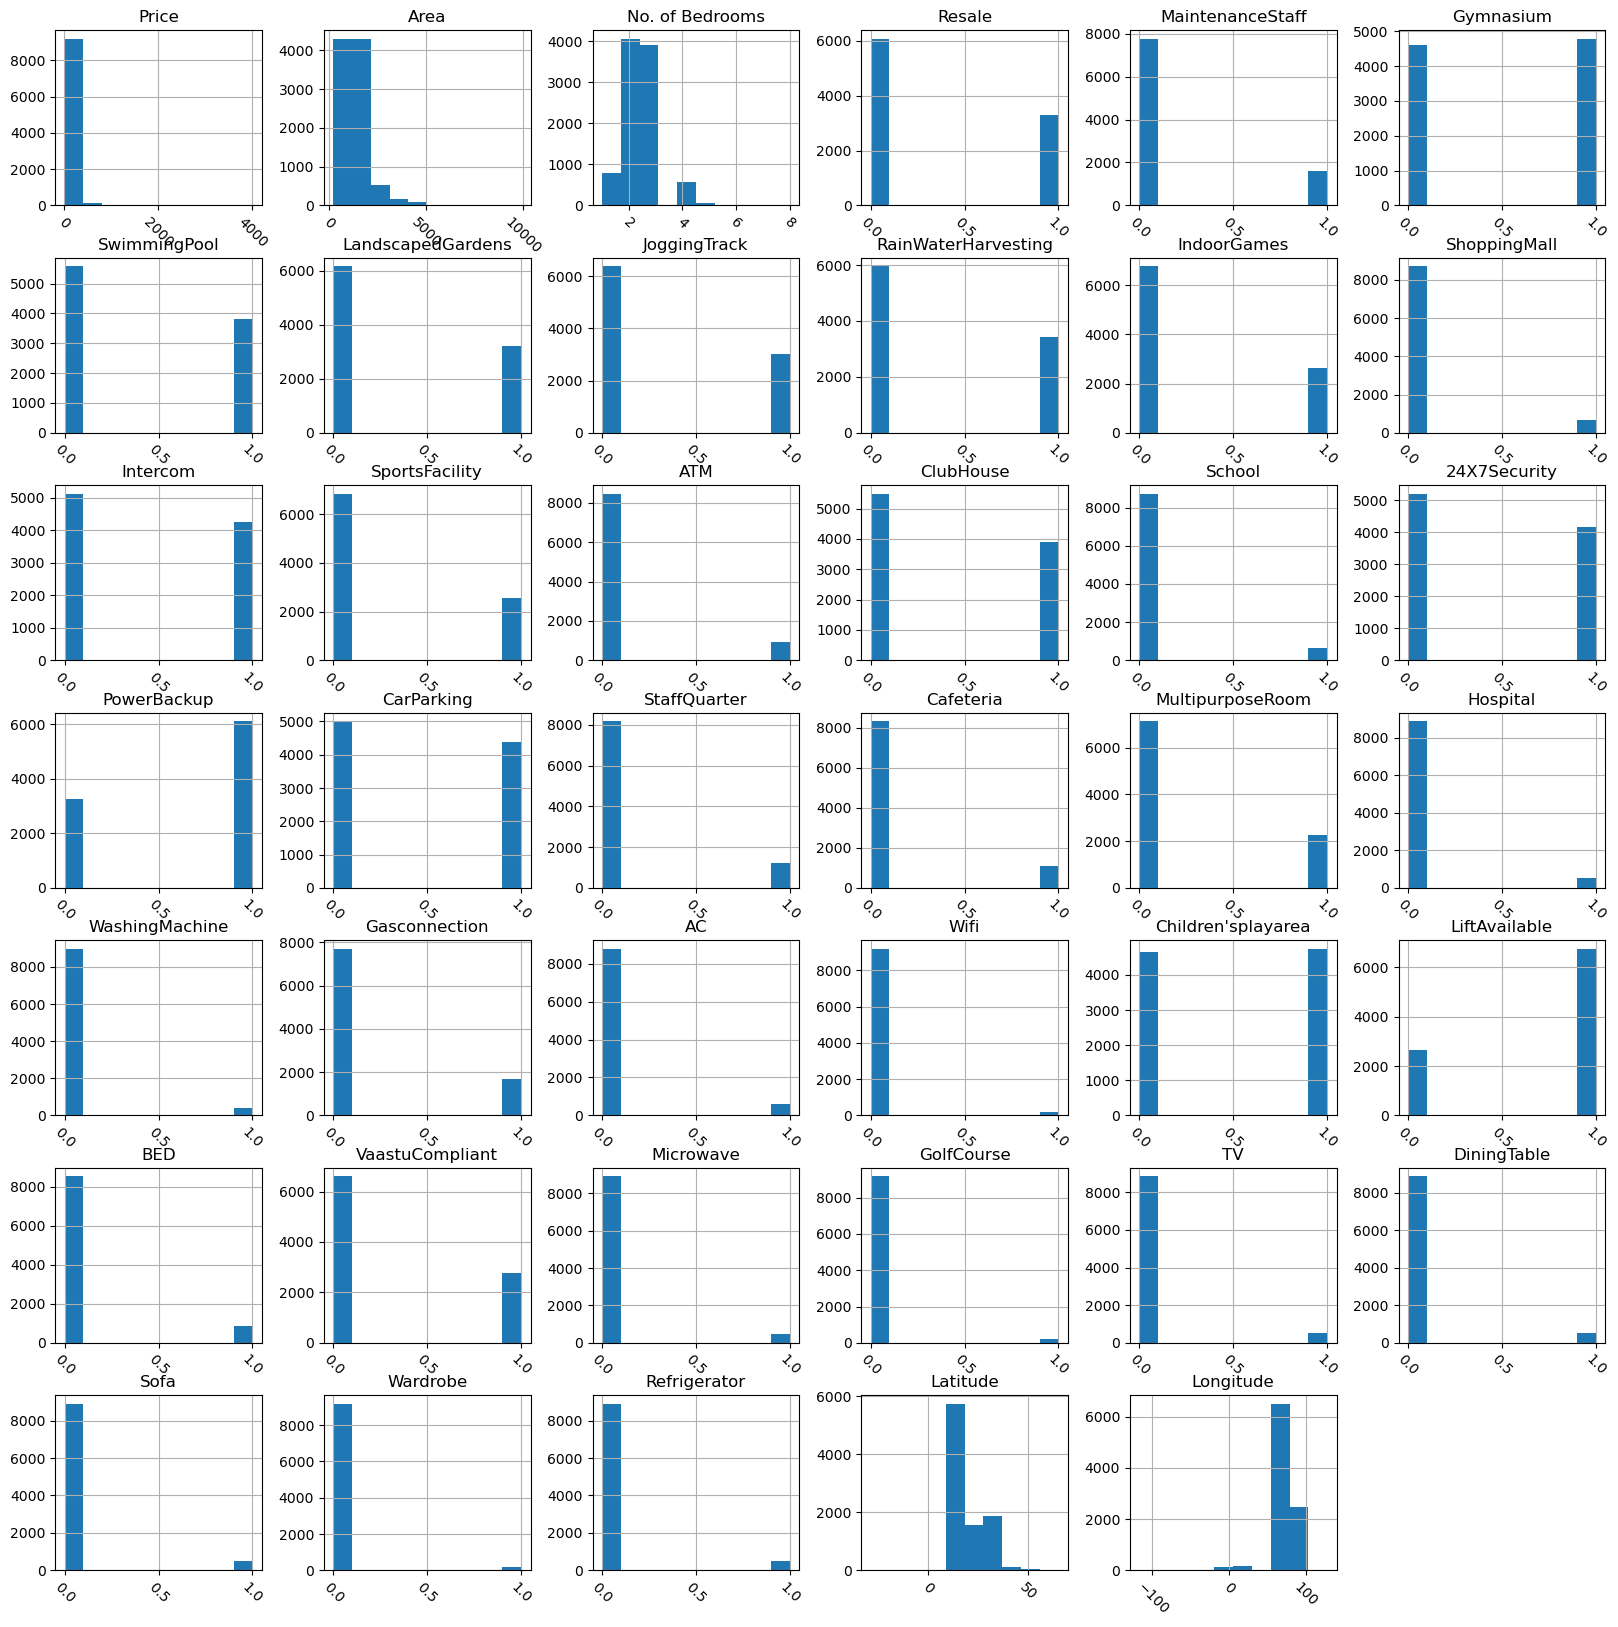

In [4]:
df.hist(figsize=(20,20), xrot=-45)

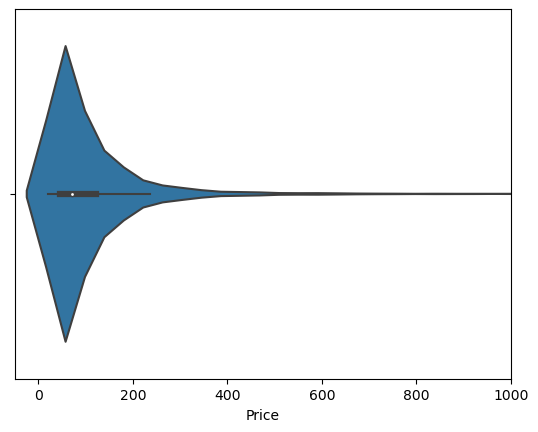

In [5]:
sb.violinplot(data=df, x='Price')
plt.xlim(-50, 1000)
plt.show()

In [6]:
df.Price.median()

70.0

In [7]:
df.select_dtypes(exclude=["object"]).isnull().sum()

Price                  0
Area                   0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0
Latitude               0


In [8]:
df.Area.sort_values(ascending=False)

766     9900
764     9700
6476    9400
753     8902
7454    8500
        ... 
9268     245
5455     220
5451     220
5453     210
5452     200
Name: Area, Length: 9390, dtype: int64

In [9]:
df = df[df.Area < 500000]

C:\Users\lolik\AppData\Local\Temp\ipykernel_3928\1545357598.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr(), dtype=np.bool)
C:\Users\lolik\AppData\Local\Temp\ipykernel_3928\1545357598.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)
C:\Users\lolik\AppData\Local\Temp\ipykernel_3928\1545357598.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default

<Axes: >

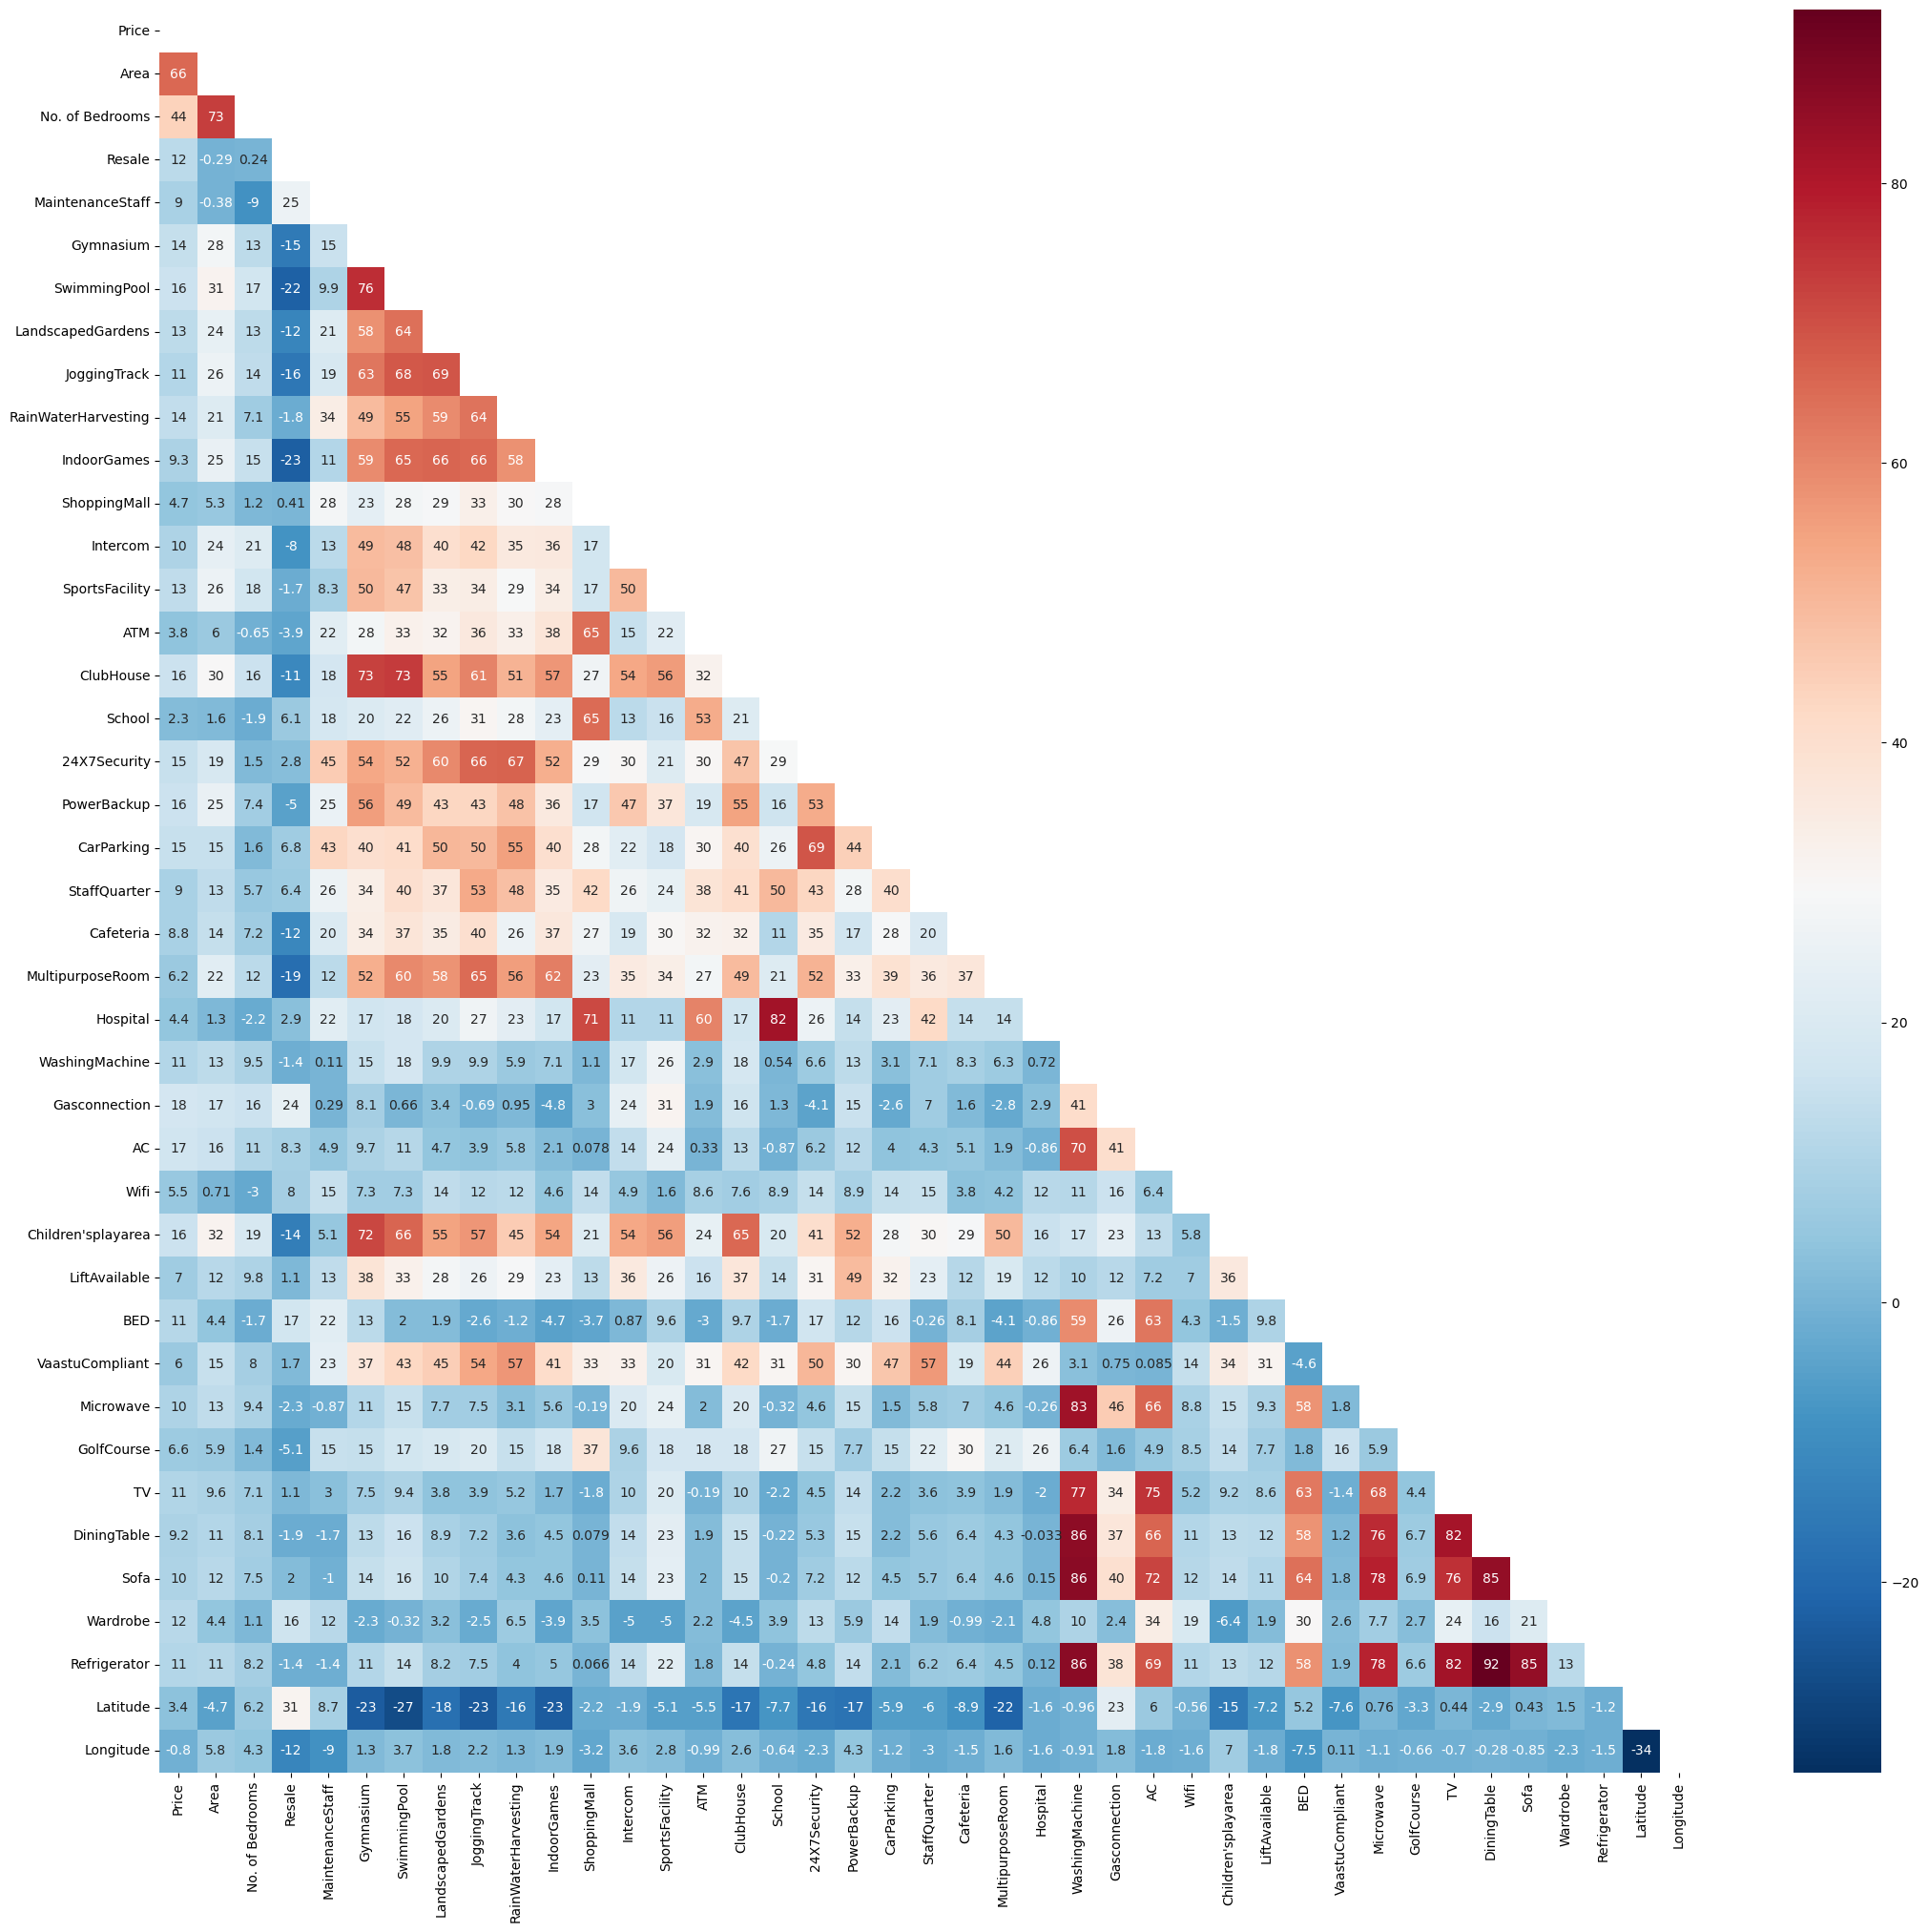

In [10]:
# mask out upper triangle
plt.figure(figsize=(26, 24))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# heatmap
sb.heatmap(df.corr()*100, 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask)

In [11]:
df.dtypes[df.dtypes=='object']

Location    object
City        object
dtype: object

In [12]:
df.Location.value_counts()

Kharghar       322
Dwarka Mor     254
Uttam Nagar    246
Kukatpally     163
Burari         144
              ... 
Green Park       1
Sodepur          1
Konnagar         1
Baguiati         1
Koproli          1
Name: Location, Length: 741, dtype: int64

In [13]:
df.City.value_counts()

Hyderabad    2276
Chennai      2047
Delhi        1989
Banglore     1708
Mumbai       1302
Kolkata        68
Name: City, dtype: int64

In [14]:
df.select_dtypes(include=['object']).isnull().sum()

Location    0
City        0
dtype: int64

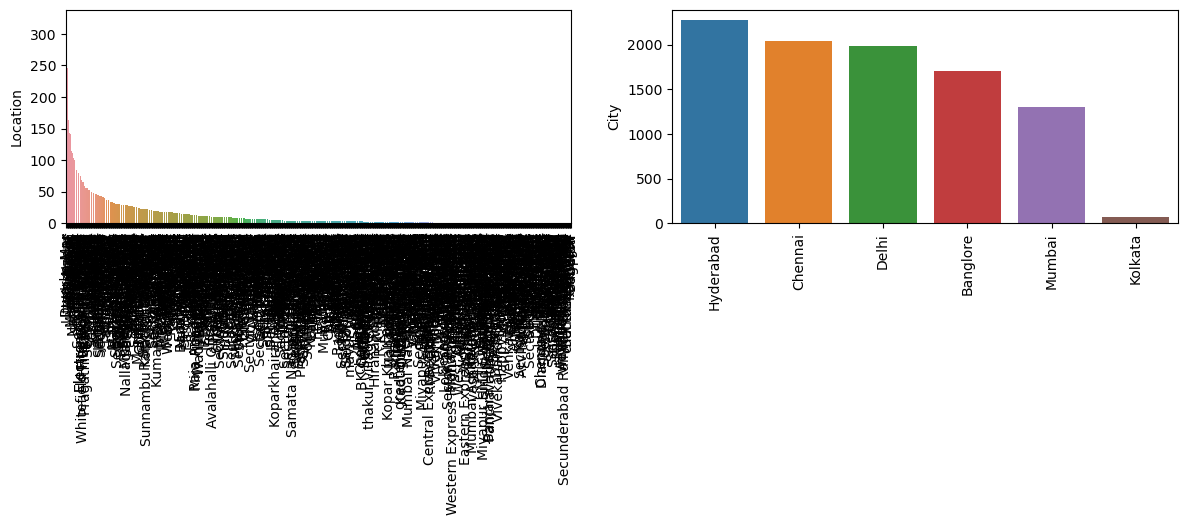

In [15]:
plt.figure(figsize=(30, 36))
index = 1
for col in df.dtypes[df.dtypes=='object'].index:
	y = df[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=90)
	sb.barplot(x=list(y.index), y=y)
	index += 1

In [16]:
df = df.drop(['Longitude', 'Latitude','Location'], axis=1)

In [17]:
# Perform one-hot encoding on categorical variables
df= pd.get_dummies(df, columns=['City'])

In [18]:
df.groupby('No. of Bedrooms').agg(['mean','median'])

Price                Area            Resale         \
                       mean median         mean  median      mean median   
No. of Bedrooms                                                            
1                 48.359406   42.0   627.213654   600.0  0.549937    1.0   
2                 65.298624   50.0  1028.651981  1050.0  0.290918    0.0   
3                122.179286   98.0  1578.500640  1560.0  0.359683    0.0   
4                292.235749  240.0  2797.533101  2630.0  0.454704    0.0   
5                850.382979  398.0  4797.021277  4239.0  0.404255    0.0   
6                425.000000  395.0  5625.000000  6000.0  0.500000    0.5   
8                575.000000  575.0  8500.000000  8500.0  1.000000    1.0   

                MaintenanceStaff        Gymnasium         ... City_Chennai  \
                            mean median      mean median  ...         mean   
No. of Bedrooms                                           ...                
1                       0.420986    0.0  0.470291    0.0  ...     0.206068   
2                       0.140783    0.0  0.437854    0.0  ...     0.282058   
3                       0.148887    0.0  0.566129    1.0  ...     0.168841   
4                       0.191638    0.0  0.670732    1.0  ...     0.130662   
5                       0.297872    0.0  0.787234    1.0  ...     0.063830   
6                       0.500000    0.5  0.250000    0.0  ...     0.000000   
8                       0.000000    0.0  0.500000    0.5  ...     0.000000   

                       City_Delhi        City_Hyderabad        City_Kolkata  \
                median       mean median           mean median         mean   
No. of Bedrooms                                                               
1                  0.0   0.109987    0.0       0.039191    0.0     0.002528   
2                  0.0   0.163180    0.0       0.237017    0.0     0.007138   
3                  0.0   0.264518    0.0       0.282169    0.0     0.008186   
4                  0.0   0.337979    0.0       0.273519    0.0     0.008711   
5                  0.0   0.234043    0.0       0.382979    0.0     0.000000   
6                  0.0   0.000000    0.0       0.500000    0.5     0.000000   
8                  0.0   0.000000    0.0       1.000000    1.0     0.000000   

                       City_Mumbai         
                median        mean median  
No. of Bedrooms                            
1                  0.0    0.562579    1.0  
2                  0.0    0.122570    0.0  
3                  0.0    0.079048    0.0  
4                  0.0    0.074913    0.0  
5                  0.0    0.106383    0.0  
6                  0.0    0.500000    0.5  
8                  0.0    0.000000    0.0  

[7 rows x 88 columns]

In [19]:
df.columns

Index(['Price', 'Area', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff',
       'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       'SportsFacility', 'ATM', 'ClubHouse', 'School', '24X7Security',
       'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC',
       'Wifi', 'Children'splayarea', 'LiftAvailable', 'BED', 'VaastuCompliant',
       'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator', 'City_Banglore', 'City_Chennai', 'City_Delhi',
       'City_Hyderabad', 'City_Kolkata', 'City_Mumbai'],
      dtype='object')

In [20]:
y = df.Price
X = df.drop('Price', axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [22]:
pipelines = {
    'lasso' : make_pipeline(StandardScaler(),
              Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(),
              Ridge(random_state=123)),
    'enet' :  make_pipeline(StandardScaler(),
              ElasticNet(random_state=123)),
    'rf' :    make_pipeline(
              RandomForestRegressor(random_state=123)),
    'gb' :    make_pipeline(
              GradientBoostingRegressor(random_state=123))
}

In [23]:
lasso_hyperparameters = {
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
ridge_hyperparameters = {
    'ridge__alpha' : [0.001, 0.005, 0.01, 0.1, 0.5, 1, 5, 10]}
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10], 
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]}

In [24]:
rf_hyperparameters = {
     'randomforestregressor__n_estimators' : [100, 200],
     'randomforestregressor__max_features' : ['auto','sqrt', 0.33],
     'randomforestregressor__min_samples_leaf' : [1, 3, 5, 10]}

In [25]:
gb_hyperparameters = {
      'gradientboostingregressor__n_estimators' : [100, 200],
      'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
      'gradientboostingregressor__max_depth' : [1, 3, 5]}

In [26]:
fitted_models = {}
for name, pipeline in pipelines.items():
    if name == 'lasso':
        hyperparameters = lasso_hyperparameters
    elif name == 'ridge':
        hyperparameters = ridge_hyperparameters
    elif name == 'enet':
        hyperparameters = enet_hyperparameters
    elif name == 'gb':
        hyperparameters = gb_hyperparameters
    elif name == 'rf':
        hyperparameters = rf_hyperparameters
    
    model = GridSearchCV(pipeline, hyperparameters, cv=10, n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model

In [27]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.551053385234715
ridge 0.5477231081971753
enet 0.5511130867986169
rf 0.7594403473226052
gb 0.7340462326309615


In [28]:
for name, model in fitted_models.items():
   pred = model.predict(X_test)
   print(name)
   print(' — — — — ')
   print('R²:', r2_score(y_test, pred))
   print('MAE:', mean_absolute_error(y_test, pred))
   print()

lasso
 — — — — 
R²: 0.6557091320969788
MAE: 37.6392489833416

ridge
 — — — — 
R²: 0.6460849824571553
MAE: 38.540183015708664

enet
 — — — — 
R²: 0.6588439860307577
MAE: 37.410350607307805

rf
 — — — — 
R²: 0.7926815482243884
MAE: 19.52533648161812

gb
 — — — — 
R²: 0.6399349154342572
MAE: 25.655788066836426



In [29]:
RandomForestRegressor(bootstrap=True,
                      criterion='mse',
                      max_depth=None,
                      max_features='auto',
                      max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=10,
                      min_samples_split=2,
                      min_weight_fraction_leaf=0.0,
                      n_estimators=200,
                      n_jobs=None,
                      oob_score=False,
                      random_state=123,
                      verbose=0,
                      warm_start=False)

RandomForestRegressor(criterion='mse', max_features='auto', min_samples_leaf=10,
                      n_estimators=200, random_state=123)

1. Area (0.622320)
2. City_Mumbai (0.106703)
3. Refrigerator (0.019896)
4. No. of Bedrooms (0.019680)
5. TV (0.015995)
6. City_Delhi (0.015160)
7. LiftAvailable (0.014947)
8. IndoorGames (0.014910)
9. AC (0.012916)
10. Wardrobe (0.012650)
11. Gasconnection (0.011210)
12. Intercom (0.010612)
13. City_Chennai (0.010065)
14. Hospital (0.009243)
15. Resale (0.007984)
16. RainWaterHarvesting (0.007670)
17. Sofa (0.006557)
18. Gymnasium (0.006254)
19. DiningTable (0.005979)
20. Children'splayarea (0.005956)
21. Microwave (0.005948)
22. BED (0.005206)
23. Cafeteria (0.004705)
24. MultipurposeRoom (0.003866)
25. StaffQuarter (0.003506)
26. SportsFacility (0.003430)
27. City_Hyderabad (0.003424)
28. CarParking (0.003244)
29. WashingMachine (0.002996)
30. JoggingTrack (0.002948)
31. MaintenanceStaff (0.002909)
32. ClubHouse (0.002888)
33. VaastuCompliant (0.002827)
34. SwimmingPool (0.002736)
35. LandscapedGardens (0.002264)
36. PowerBackup (0.001918)
37. City_Banglore (0.001811)
38. School (0.0

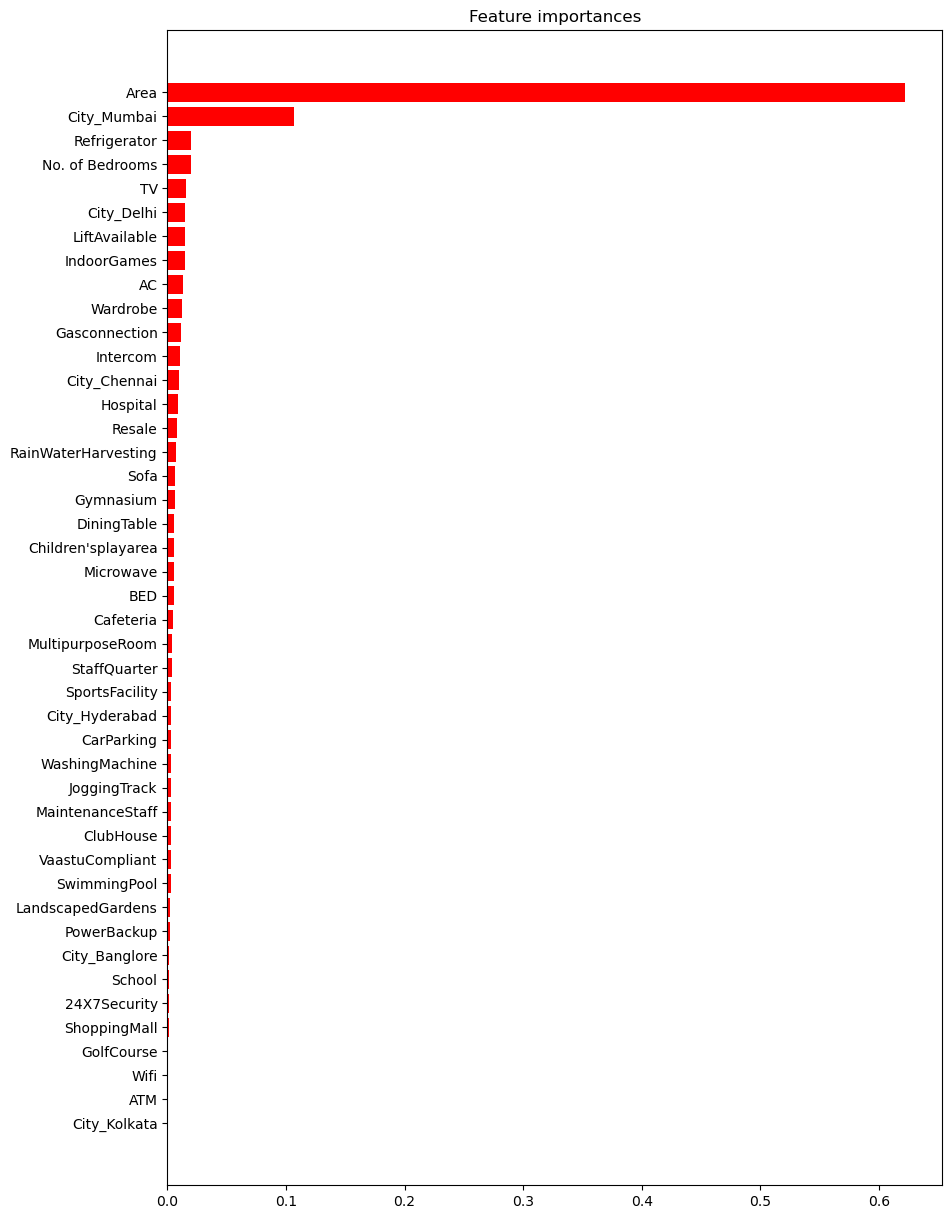

In [30]:
# Define the model
model_RFR = RandomForestRegressor(n_estimators=10)

# Train the model
model_RFR.fit(X_train, y_train)

# Access the feature importances
coef = model_RFR.feature_importances_
ind = np.argsort(-coef)

# Print feature importances
for i in range(X_train.shape[1]):
    print("%d. %s (%f)" % (i + 1, X.columns[ind[i]], coef[ind[i]]))

# Plot feature importances
plt.figure(figsize=(10,15))
x = range(X_train.shape[1])
y = coef[ind][:X_train.shape[1]]
plt.title("Feature importances")
ax = plt.subplot()
plt.barh(x, y, color='red')
ax.set_yticks(x)
ax.set_yticklabels(X.columns[ind])
plt.gca().invert_yaxis()


In [31]:
with open('fitest_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

In [32]:
df.columns

Index(['Price', 'Area', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff',
       'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       'SportsFacility', 'ATM', 'ClubHouse', 'School', '24X7Security',
       'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC',
       'Wifi', 'Children'splayarea', 'LiftAvailable', 'BED', 'VaastuCompliant',
       'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator', 'City_Banglore', 'City_Chennai', 'City_Delhi',
       'City_Hyderabad', 'City_Kolkata', 'City_Mumbai'],
      dtype='object')

In [44]:
import pickle
import numpy as np
import pandas as pd

# Load the model from the pickle file
with open('fitest_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Load your new data as a pandas DataFrame
# Assuming your model is trained on data with the above features

# New data point
new_data = [
    100,     # Area
    4,        # No. of Bedrooms
    1,        # Resale
    1,        # MaintenanceStaff
    0,        # Gymnasium
    1,        # SwimmingPool
    1,        # LandscapedGardens
    0,        # JoggingTrack
    1,        # RainWaterHarvesting
    1,        # IndoorGames
    1,        # ShoppingMall
    1,        # Intercom
    1,        # SportsFacility
    0,        # ATM
    1,        # ClubHouse
    1,        # School
    1,        # 24X7Security
    1,        # PowerBackup
    1,        # CarParking
    0,        # StaffQuarter
    1,        # Cafeteria
    1,        # MultipurposeRoom
    1,        # Hospital
    1,        # WashingMachine
    1,        # Gasconnection
    1,        # AC
    1,        # Wifi
    1,        # Children'splayarea
    1,        # LiftAvailable
    3,        # BED
    1,        # VaastuCompliant
    1,        # Microwave
    0,        # GolfCourse
    1,        # TV
    1,        # DiningTable
    1,        # Sofa
    1,        # Wardrobe
    1,        # Refrigerator
    0,0,1,0,0,0 #Location
]

# Make predictions on the new data point
prediction = model_RFR.predict([new_data])

# Print the prediction
print('Price: ',prediction)

Price:  [47.504]


C:\Users\lolik\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
